In [ ]:
#Multilayer Perceptron in Tensorflow for p53
import numpy as np
import pandas as pd

df = pd.read_csv('1tup_revised_features_electro.csv')
PK11000_df = pd.read_csv('1tup_PK11000_revised_features_electro.csv')
df.sample(5)

,Type,1tup_pep[elec14],1tup_pep[elec],1tup_pep[total],DRMSD
1548,1,13157.0889,-5156.5247,9224.0869,1.9198
2129,1,13228.7937,-5244.9036,9211.7431,2.7574
961,1,13161.4821,-5089.5420,9259.4089,1.7208
3940,0,928.5121,-8879.5884,-2421.0990,4.3061
4226,0,931.0596,-9122.3859,-2631.4873,3.0013


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X = df.drop('Type',axis=1)
y = df['Type']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2, random_state = 42
)

In [ ]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#PK11000_test_scaled = scaler.transform(PK11000_df)

In [ ]:
#neural network architecture
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
125/125 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9970 - precision: 0.9940 - recall: 1.0000
Epoch 2/10
125/125 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 4/10
125/125 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 5/10
125/125 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 6/10
125/125 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 7/10
125/125 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 8/10
125/12

In [ ]:
#visualize initial model performance
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

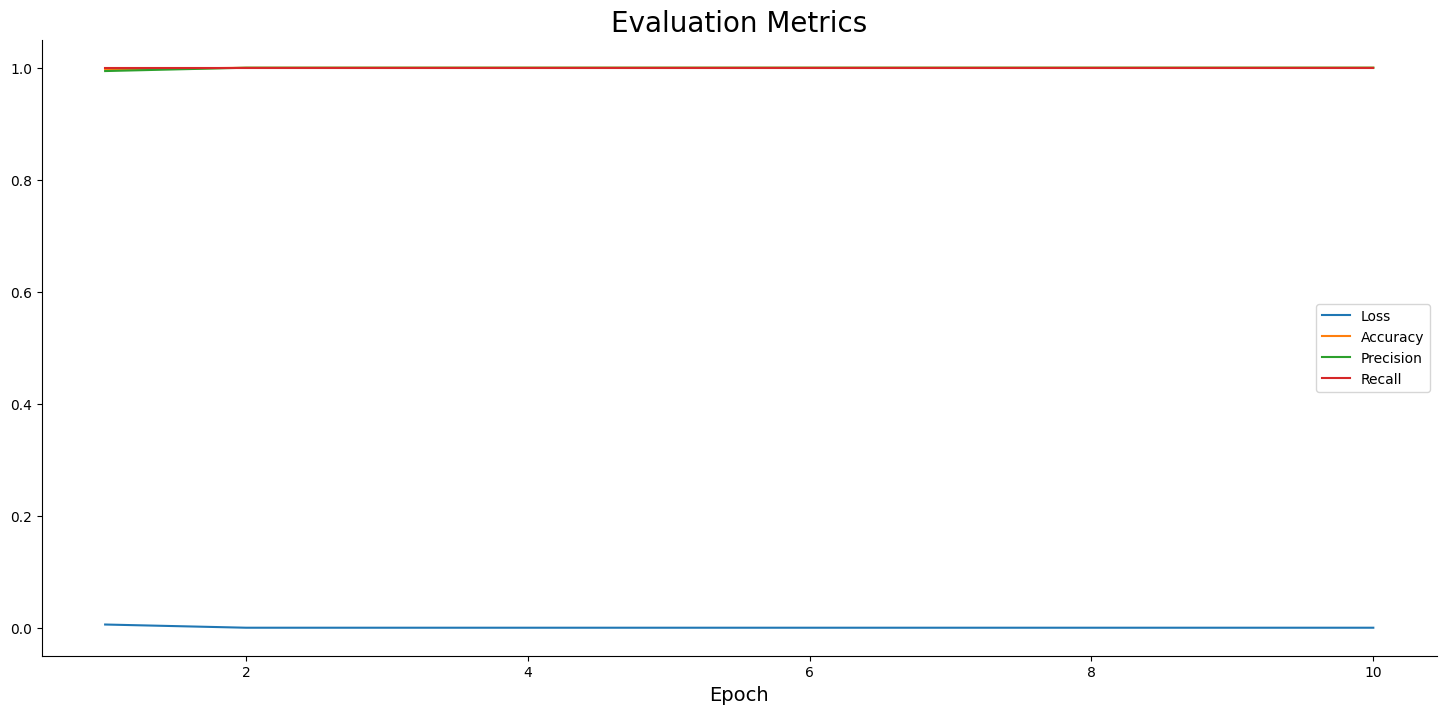

In [ ]:
#model performance during training
plt.plot(
    np.arange(1,11),
    history.history['loss'],label='Loss'
)

plt.plot(
    np.arange(1,11),
    history.history['accuracy'],label='Accuracy'
)
plt.plot(
    np.arange(1,11),
    history.history['precision'],label='Precision'
)
plt.plot(
    np.arange(1,11),
    history.history['recall'],label='Recall'
)
plt.title('Evaluation Metrics',size=20)
plt.xlabel('Epoch',size=14)
plt.legend();

In [ ]:
#predict set aside testing data
predictions = model.predict(X_test_scaled)

32/32 [==============================] - 0s 2ms/step


In [ ]:
prediction_classes = [
    1 if prob>0.5 else 0 for prob in np.ravel(predictions)
]

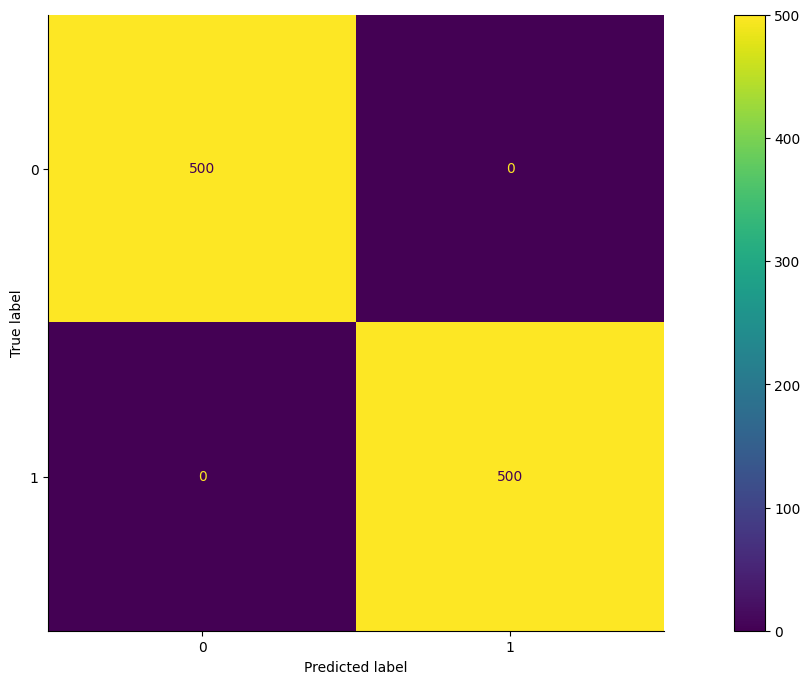

In [ ]:
#confusion matrix 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_1=(confusion_matrix(y_test,prediction_classes))
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp_1.plot()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


In [ ]:
#Effector 8
df_8 = pd.read_csv('1TUP_8_REVISED_FEATURES_electro.csv')

In [ ]:
#Effector 8 cont.
E8_X = df_8.drop('Type',axis=1)
E8_y = df_8['Type']

In [ ]:
#Effector 8 scaled
scaler = StandardScaler()
E8_train_scaled = scaler.fit_transform(X_train)
E8_test_scaled = scaler.transform(E8_X)

In [ ]:
#Predict Effector 8 Testing Data
E8_predictions = model.predict(E8_test_scaled)

313/313 [==============================] - 1s 4ms/step


In [ ]:
E8_prediction_classes = [
    1 if prob>0.5 else 0 for prob in np.ravel(E8_predictions)
]

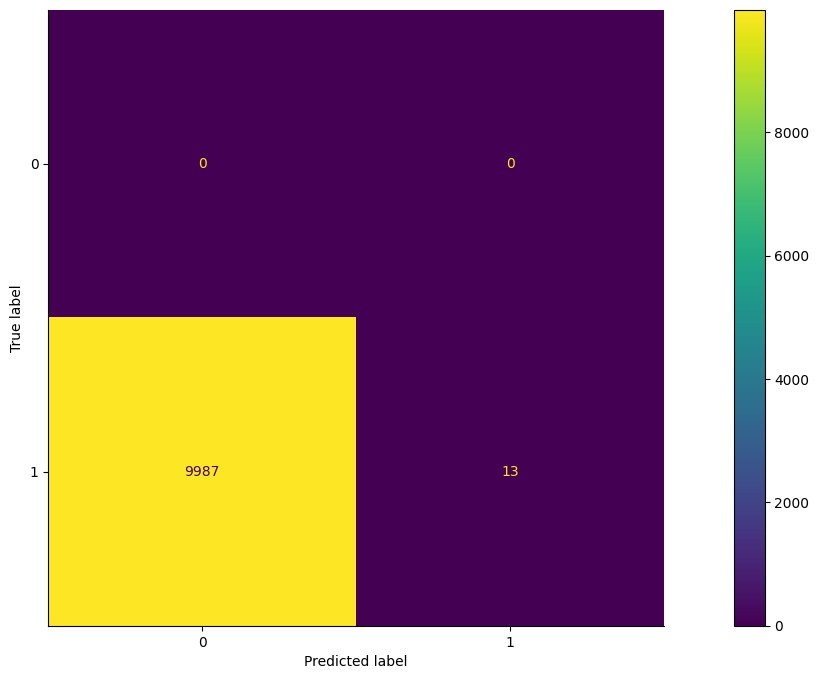

In [ ]:
#Effector 8 confusion matrix
cm_E8 = (confusion_matrix(E8_y,E8_prediction_classes))
disp_E8 = ConfusionMatrixDisplay(confusion_matrix=cm_E8)
disp_E8.plot()

In [ ]:
print(f'Accuracy: {accuracy_score(E8_y, E8_prediction_classes):.2f}')
print(f'Precision: {precision_score(E8_y, E8_prediction_classes):.2f}')
print(f'Recall: {recall_score(E8_y, E8_prediction_classes):.2f}')

Accuracy: 0.00
Precision: 1.00
Recall: 0.00


In [ ]:
#PK11000 cont.
PK11000_X = PK11000_df.drop('Type',axis=1)
PK11000_y = PK11000_df['Type']

In [ ]:
#PK11000 scaled
scaler = StandardScaler()
PK11000_train_scaled = scaler.fit_transform(X_train)
PK11000_test_scaled = scaler.transform(PK11000_X)

In [ ]:
#Predict PK11000 Testing Data
PK11000_predictions = model.predict(PK11000_test_scaled)

313/313 [==============================] - 1s 4ms/step


In [ ]:
PK11000_prediction_classes = [
    1 if prob>0.5 else 0 for prob in np.ravel(PK11000_predictions)
]

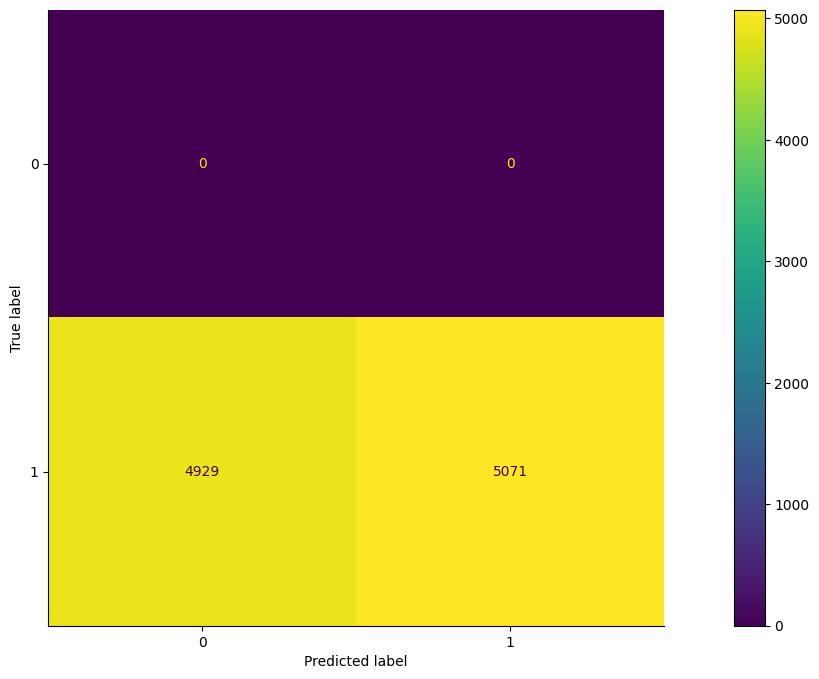

In [ ]:
#PK11000 confusion matrix
PK11000_cm=(confusion_matrix(PK11000_y,PK11000_prediction_classes))
disp_PK11000 = ConfusionMatrixDisplay(confusion_matrix=PK11000_cm)
disp_PK11000.plot()


In [ ]:
print(f'Accuracy: {accuracy_score(PK11000_y, PK11000_prediction_classes):.2f}')
print(f'Precision: {precision_score(PK11000_y, PK11000_prediction_classes):.2f}')
print(f'Recall: {recall_score(PK11000_y, PK11000_prediction_classes):.2f}')

Accuracy: 0.51
Precision: 1.00
Recall: 0.51


In [ ]:
#Effector 22
df_22 = pd.read_csv('1TUP_22_REVISED_FEATURES_electro.csv')

In [ ]:
#Effector 22 cont.
E22_X = df_22.drop('Type',axis=1)
E22_y = df_22['Type']

In [ ]:
#Effector 22 scaled
scaler = StandardScaler()
E22_train_scaled = scaler.fit_transform(X_train)
E22_test_scaled = scaler.transform(E22_X)

In [ ]:
#Predict Effector 22 Testing Data
E22_predictions = model.predict(E22_test_scaled)

313/313 [==============================] - 1s 3ms/step


In [ ]:
E22_prediction_classes = [
    1 if prob>0.5 else 0 for prob in np.ravel(E22_predictions)
]

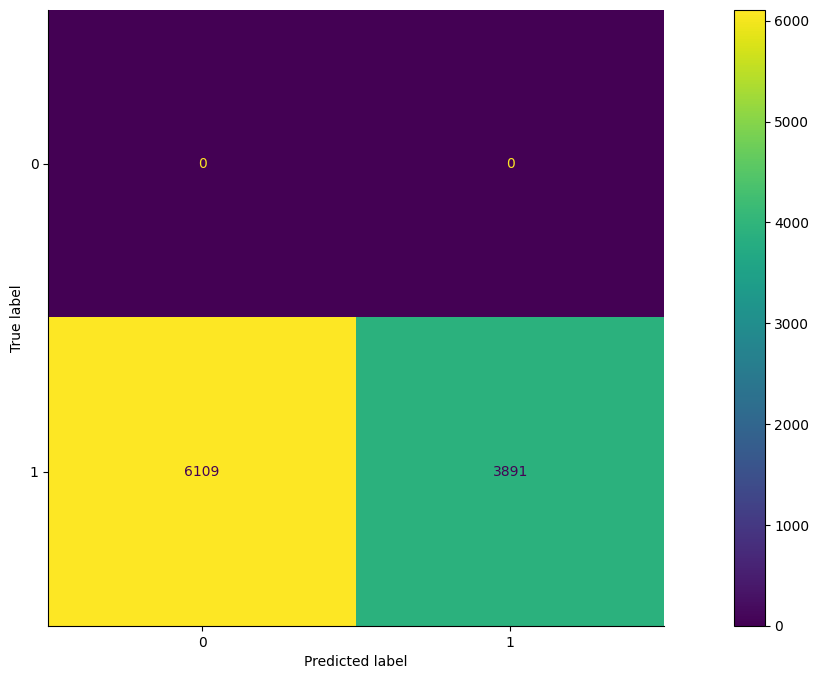

In [ ]:
#Effector 22 confusion matrix
cm_E22=(confusion_matrix(E22_y,E22_prediction_classes))
disp_E22 = ConfusionMatrixDisplay(confusion_matrix=cm_E22)
disp_E22.plot()

In [ ]:
print(f'Accuracy: {accuracy_score(E22_y, E22_prediction_classes):.2f}')
print(f'Precision: {precision_score(E22_y, E22_prediction_classes):.2f}')
print(f'Recall: {recall_score(E22_y, E22_prediction_classes):.2f}')

Accuracy: 0.39
Precision: 1.00
Recall: 0.39


In [ ]:
#Effector 27
df_27 = pd.read_csv('1TUP_27_REVISED_FEATURES_electro.csv')

In [ ]:
#Effector 27 cont.
E27_X = df_27.drop('Type',axis=1)
E27_y = df_27['Type']

In [ ]:
#Effector 27 scaled
scaler = StandardScaler()
E27_train_scaled = scaler.fit_transform(X_train)
E27_test_scaled = scaler.transform(E27_X)

In [ ]:
#Predict Effector 27 Testing Data
E27_predictions = model.predict(E27_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [ ]:
E27_prediction_classes = [
    1 if prob>0.5 else 0 for prob in np.ravel(E27_predictions)
]

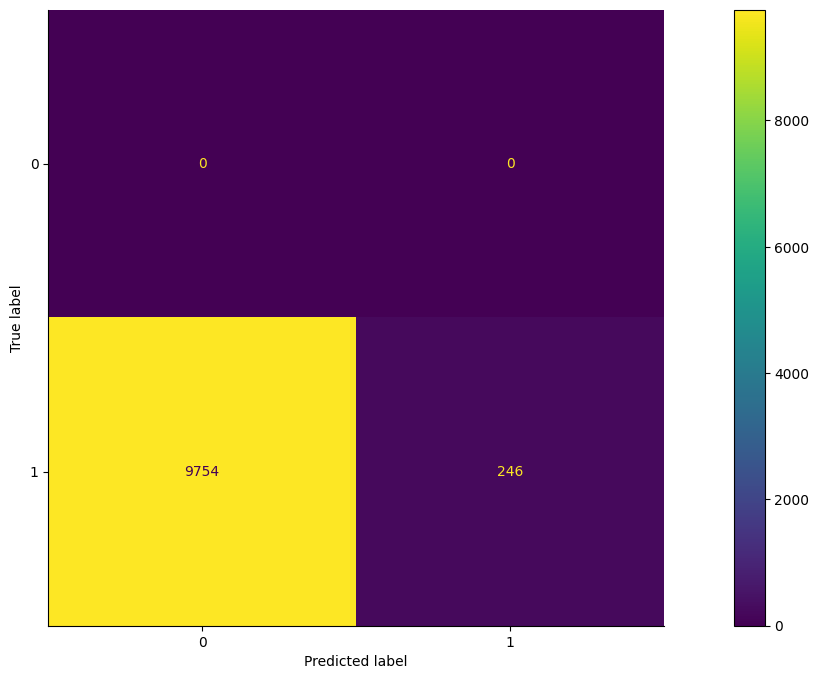

In [ ]:
#Effector 27 confusion matrix
cm_E27=(confusion_matrix(E27_y,E27_prediction_classes))
disp_E27 = ConfusionMatrixDisplay(confusion_matrix=cm_E27)
disp_E27.plot()

In [ ]:
print(f'Accuracy: {accuracy_score(E27_y, E27_prediction_classes):.2f}')
print(f'Precision: {precision_score(E27_y, E27_prediction_classes):.2f}')
print(f'Recall: {recall_score(E27_y, E27_prediction_classes):.2f}')

Accuracy: 0.02
Precision: 1.00
Recall: 0.02


In [ ]:
#Effector 20
df_20 = pd.read_csv('1TUP_20_REVISED_FEATURES_electro.csv')

In [ ]:
#Effector 20 cont.
E20_X = df_20.drop('Type',axis=1)
E20_y = df_20['Type']

In [ ]:
#Effector 20 scaled
scaler = StandardScaler()
E20_train_scaled = scaler.fit_transform(X_train)
E20_test_scaled = scaler.transform(E20_X)

In [ ]:
#Predict Effector 20 Testing Data
E20_predictions = model.predict(E20_test_scaled)

313/313 [==============================] - 1s 3ms/step


In [ ]:
E20_prediction_classes = [
    1 if prob>0.5 else 0 for prob in np.ravel(E20_predictions)
]

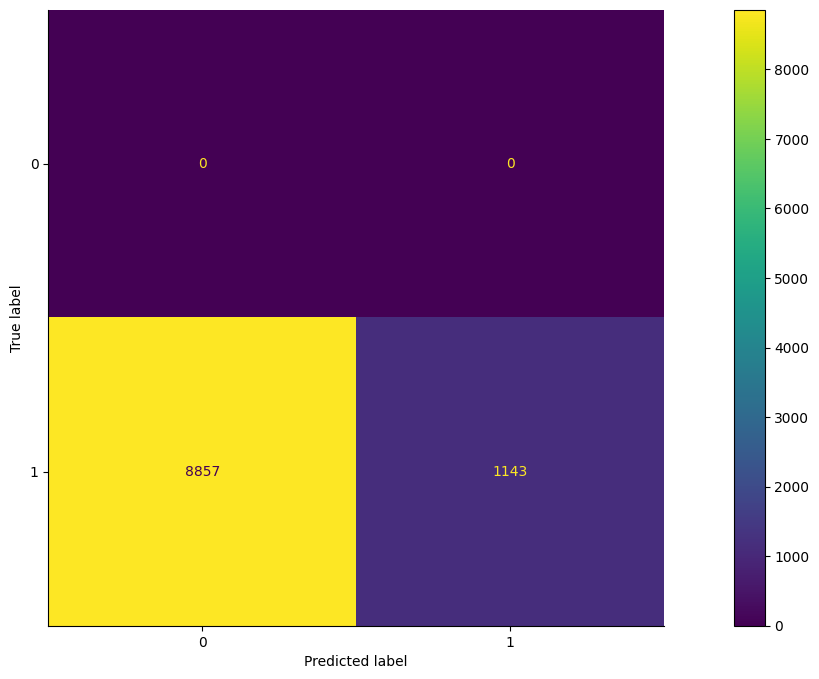

In [ ]:
#Effector 20 confusion matrix
cm_E20=(confusion_matrix(E20_y,E20_prediction_classes))
disp_E20 = ConfusionMatrixDisplay(confusion_matrix=cm_E20)
disp_E20.plot()

In [ ]:
print(f'Accuracy: {accuracy_score(E20_y, E20_prediction_classes):.2f}')
print(f'Precision: {precision_score(E20_y, E20_prediction_classes):.2f}')
print(f'Recall: {recall_score(E20_y, E20_prediction_classes):.2f}')

Accuracy: 0.11
Precision: 1.00
Recall: 0.11


In [ ]:
#Model Visualization
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 15.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=eac34d0f8bb6fc8cb6c0e7611450bf4f837827e62ae1b44dd1cb32eedde018dc
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Model Viz Cont.
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename='ann_viz_model', title='MLP Model')

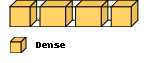

In [ ]:
#visualkeras
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

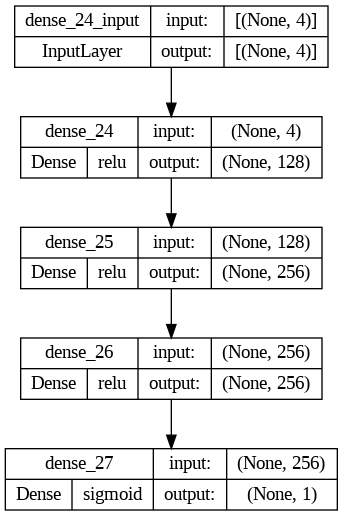

In [ ]:
#keras model plot
tf.keras.utils.plot_model(
model,
to_file="modelplot.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)


In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(df, color="Type", 
          labels=dict(zip(list(df.columns), 
          list(['_'.join(i.split('_')[1:]) for i in df.columns]))),
          color_continuous_scale=px.colors.diverging.Tealrose,
          color_continuous_midpoint=27)

fig.show()